Question 1: What is Simple Linear Regression?

Simple Linear Regression is a statistical technique that models the relationship between one independent variable (X) and one dependent variable (Y) by fitting a straight line through the data.

Question 2: What are the key assumptions of Simple Linear Regression?

1. Linearity – The relationship between X and Y is linear.

2. Independence – Observations and residuals are independent of one another.

3. Homoscedasticity – Constant variance of residuals across levels of X.

4. Normality of errors – Residuals are normally distributed (important for inference).

5. No significant outliers or influential points – Outliers can distort the regression line.


Question 3: What is heteroscedasticity, and why is it important to address in regression
models?

Heteroscedasticity occurs when the variance of residuals changes across the range of predicted values (non-constant spread).
Visually, residual plots show a funnel shape (narrow at one end, wide at the other).

Why it matters:

Violates the assumption of constant variance.

Causes inefficient (biased variance) estimates → unreliable t and F tests.

Confidence intervals and p-values become misleading.

Question 4: What is Multiple Linear Regression?

Multiple Linear Regression models the relationship between a dependent variable and two or more independent variables.

It explains how several predictors collectively influence Y (e.g., predicting house price using area, rooms, location).

Assumptions are extensions of those for simple regression plus no multicollinearity among predictors.

Question 5: What is polynomial regression, and how does it differ from linear
regression?

Polynomial Regression models nonlinear relationships by including powers of X as predictors





Intercept: 0.17999999999999794
Slope: 1.9800000000000004


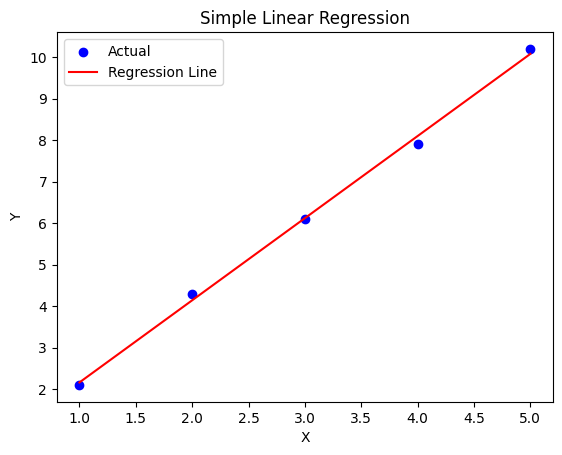

In [1]:
# Question 6: Implement a Python program to fit a Simple Linear Regression model to
# the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.
# (Include your Python code and output in the code box below.)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# model
model = LinearRegression()
model.fit(X, Y)

# parameters
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# predictions
Y_pred = model.predict(X)

# plot
plt.scatter(X, Y, color='blue', label='Actual')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [6]:
# Question 7: Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.
# (Include your Python code and output in the code box below.)import pandas as pd
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# data
df = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# independent vars
X = df[['Area', 'Rooms']]
X = sm.add_constant(X)
y = df['Price']

# fit model
model = sm.OLS(y, X).fit()
print(model.summary())

# VIF calculation
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:\n", vif_data)



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sat, 08 Nov 2025   Prob (F-statistic):             0.0377
Time:                        17:20:40   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


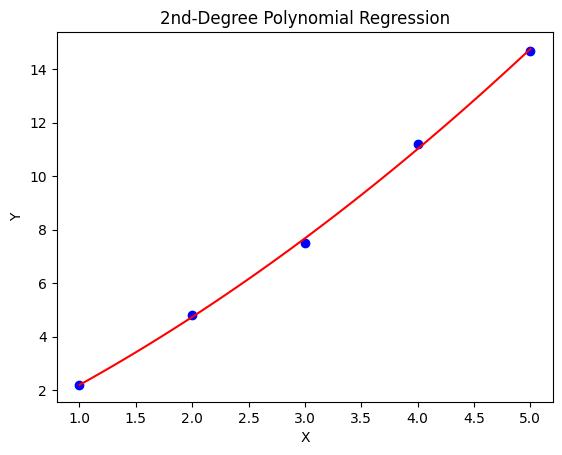

In [3]:
# Question 8: Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# 3
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.
# (Include your Python code and output in the code box below.)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2,4.8,7.5,11.2,14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# prediction curve
X_range = np.linspace(1,5,100).reshape(-1,1)
Y_pred = model.predict(poly.transform(X_range))

plt.scatter(X, Y, color='blue')
plt.plot(X_range, Y_pred, color='red')
plt.title('2nd-Degree Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


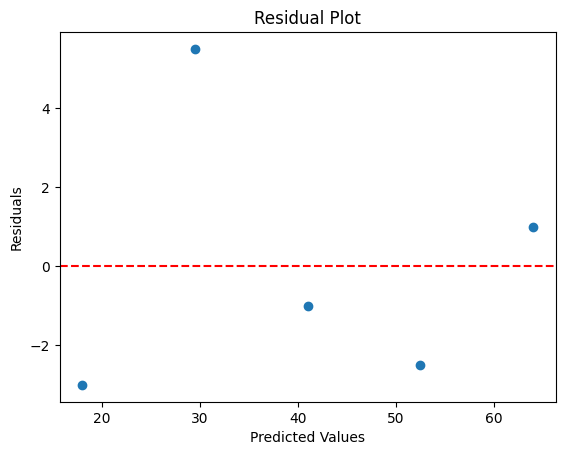

In [4]:
# Question 9: Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

model = LinearRegression().fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.



Scenario: Predict house prices using Area, Rooms, Location; detected both heteroscedasticity and multicollinearity.

Steps to address:

A. Heteroscedasticity

Transform variables – apply log or sqrt to stabilize variance (e.g., log(Price) ~ log(Area) + Rooms).

Weighted Least Squares (WLS) – assign weights ∝ 1 / Var(ε).

Robust standard errors – use HC1 / White correction to get valid p-values even with unequal variances.

Model refinement – add relevant predictors that explain the pattern in variance.

B. Multicollinearity

Check VIF values; if VIF > 5–10, consider removing or combining correlated features (e.g., “Area” and “Total Sq Ft”).

Principal Component Regression (PCR) or Regularization:

Ridge Regression reduces variance by penalizing large coefficients.

Lasso Regression performs variable selection and shrinks redundant predictors.

Standardize features before regularization for consistent penalty scaling.

C. Final Model Validation

Split into train/test sets; assess R², RMSE, and residual plots.

Use cross-validation to ensure model stability.

Communicate assumptions and diagnostic checks in the report.
